In [ ]:
#Dataset: https://www.kaggle.com/grassknoted/asl-alphabet

In [64]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import pickle
from keras.models import load_model



# returns a compiled model
# identical to the previous one
saved_model = load_model('my_model_1.h5')

## Data preparation: part of training set can be seen below

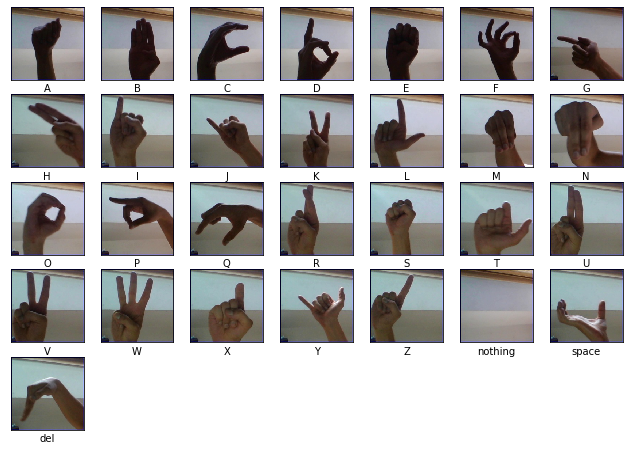

In [83]:
train_dir = '/Users/availablenow/Downloads/asl_alphabet_train 2'
test_dir = '/Users/availablenow/Downloads/asl_test_images'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = test_dir + "/{0}/{0}0002_test.jpg".format(classes[i])
    path2 = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    img2 = plt.imread(path2)
    plt.imshow(img)
    plt.imshow(img2)
    plt.xlabel(classes[i])

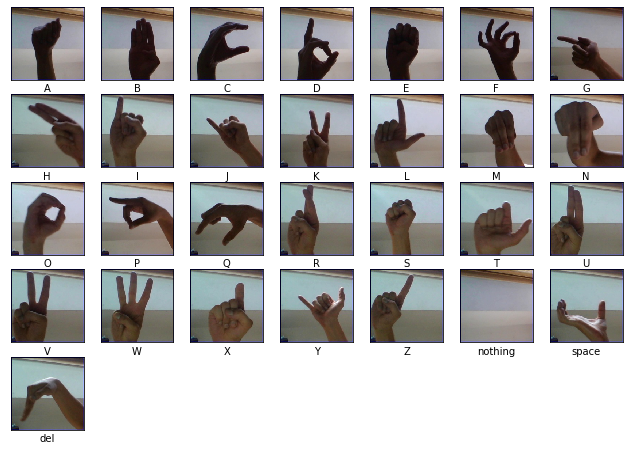

In [84]:
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = test_dir + "/{0}/{0}0002_test.jpg".format(classes[i])
    path2 = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    img2 = plt.imread(path2)
    plt.imshow(img)
    plt.imshow(img2)
    plt.xlabel(classes[i])

## Data preparation: data is being loaded and train and test set is split

In [16]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.scandir(train_dir):
        if folder.is_dir():
            index +=1
            print(index, folder.name)
            for image in os.scandir(train_dir + "/" + folder.name):
                if image.is_file() and ".jpg" in image.name:
                    temp_img = cv2.imread(train_dir + '/' + folder.name + '/' + image.name)
                    temp_img = cv2.resize(temp_img, size)
                    #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
                    images.append(temp_img)
                    labels.append(index)
                    #print(index, folder.name)
            

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    print(index)
    return x_train, x_test, y_train, y_test, labels



start = time()
x_train, x_test, y_train, y_test, labels = load_data(train_dir)
print('Loading:', time() - start)
print(x_train.shape)
print(y_train.shape)

0 R
1 U
2 I
3 N
4 G
5 Z
6 T
7 S
8 A
9 F
10 O
11 H
12 del
13 nothing
14 space
15 M
16 J
17 C
18 D
19 V
20 Q
21 X
22 E
23 B
24 K
25 L
26 Y
27 P
28 W
Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
28
Loading: 111.75951600074768
(78300, 32, 32, 3)
(78300, 29)


In [18]:
len(y_train[0])

29

In [19]:
len(labels)

87000

## Model is loaded and run on dataset

classes = 29
batch = 128
epochs = 3
learning_rate = 0.0001

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

Epoch 1/3
551/551 [==============================] - 1595s 3s/step - loss: 1.1423 - accuracy: 0.6862 - val_loss: 0.1142 - val_accuracy: 0.9635
Epoch 2/3
551/551 [==============================] - 2759s 5s/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 3/3
551/551 [==============================] - 1982s 4s/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0549 - val_accuracy: 0.9828
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)      

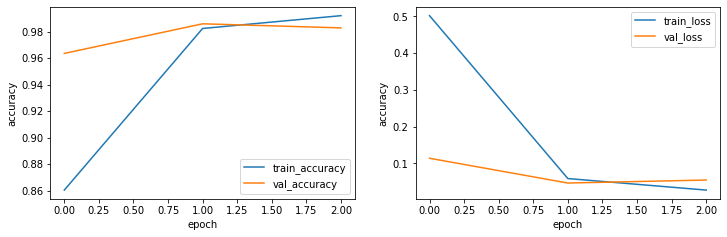

272/272 [==============================] - 29s 108ms/step - loss: 0.0496 - accuracy: 0.9854

Train time:  6336.042521953583
Test accuracy: 0.9854022860527039
Test loss: 0.049620371311903
Test time:  29.454005002975464


In [25]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)

In [63]:
model.save('my_model_2.h5') 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

In [ ]:
#https://machinelearningmastery.com/object-recognition-with-deep-learning/
#https://towardsdatascience.com/object-detection-with-neural-networks-a4e2c46b4491
#https://www.pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/


## Error Analysis: error analysis is performed to view misclassifications on test set

In [ ]:
###### error analysis- checked images that were wrongly predicted, 
#large number of Ds classified as Cs (18 to 17) weird because those seem to be the darkest colored images
#85 D classified correctly and 259 wrong
#label 21 is second most wrong

In [ ]:
inc= np.nonzero(model.predict_classes(x_test))

In [ ]:
inc = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
len(inc)


In [ ]:
inc[29]

In [ ]:
count = 0
incorrectPositions = []
for i,n in enumerate(inc):
    position = np.where(y_test[i] == 1)
    print(position[0][0])
    if position[0][0] != n:
        incorrectPositions.append((x_test[i], position[0][0], n))

In [ ]:
incorrectPositions[0]

In [ ]:
from matplotlib import pyplot as plt
wrongLabels = []
for i,n in incorrectPositions:
    print(i[1],i[2])
    plt.imshow(i[0], interpolation='nearest')
    wrongLabels.append(i[1])
    plt.show()

In [ ]:
plt.hist(wrongLabels, 29)

In [70]:
rightList = []
for n,i in enumerate(x_test):
    position = np.where(y_test[n] == 1)
    if (position[0][0] == 18) and position[0][0] != inc[n]:
        plt.imshow(i, interpolation='nearest')
        plt.show()
        rightList.append(n)
    

In [45]:
len(d.keys())

29

## More Error Analysis: Model is tested on real world images of Anusha's hands and error analysis is performed to view misclassifications  

In [ ]:
d = {"R":0,
"U":1,
"I":2,
"N":3,
"G":4,
"Z":5,
"T":6,
"S":7,
"A":8,
"F":9,
"O":10,
"H":11,
"del":12,
"nothing":13,
"space":14,
"M":15,
"J":16,
"C":17,
"D":18,
"V":19,
"Q":20,
"X":21,
"E":22,
"B":23,
"K":24,
"L":25,
"Y":26,
"P":27,
"W":28}

In [28]:
#combining test and train data to train model
def uploadOwn_data(test_dir):
    images = []
    labels = []
    size = 32,32
    #index = -
    for folder in os.scandir(test_dir):
        if folder.is_dir():
            #print(index, folder.name)
            for image in os.scandir(test_dir + "/" + folder.name):
                if image.is_file() and ".jpg" in image.name:
                    index = d[folder.name]
                    temp_img = cv2.imread(test_dir + '/' + folder.name + '/' + image.name)
                    temp_img = cv2.resize(temp_img, size)
                    #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
                    images.append(temp_img)
                    #plt.imshow(temp_img)
                    labels.append(index)
                    #print(index)
 
    images = np.array(images)
    images = images.astype('float32')/255.0
    #print(images)
    print(labels)
    print(len(images))
    labels = utils.to_categorical(labels)
    print(labels.shape)
    print(images.shape)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 1)
    
    #print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    #print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_test, y_test, x_train, y_train
test_dir = '/Users/availablenow/Documents/ASL Project/Copy of Images/'
start = time()
x_test, y_test, x_train, y_train, = uploadOwn_data(test_dir)
print('Loading:', time() - start)
print(x_test.shape)
#load_data(test_dir)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Loading: 79.57416200637817
(1, 32, 32, 3)


In [71]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1, 32, 32, 3), (1, 29), (60031, 32, 32, 3), (60031, 29))

In [29]:
inc = np.argmax(model.predict(x_train), axis=-1)

In [30]:
len(inc)

60031

In [58]:
import PIL

17 3


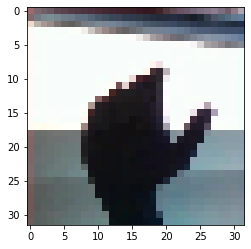

8 7


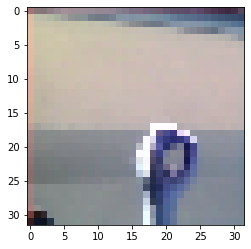

17 12


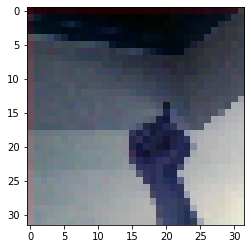

8 3


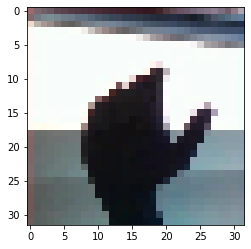

8 2


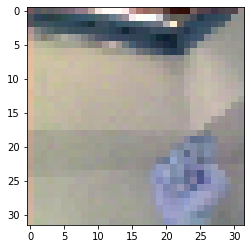

8 14


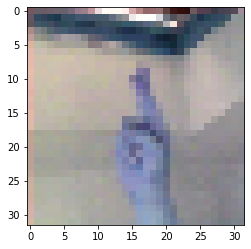

17 15


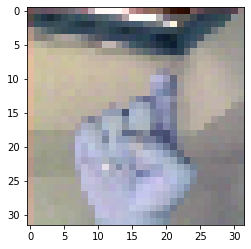

17 15


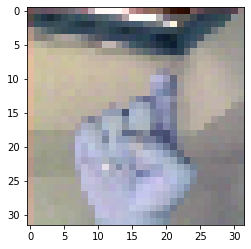

8 4


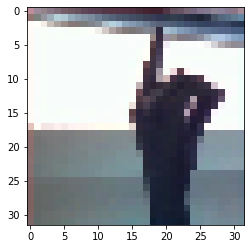

8 16


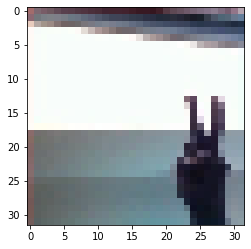

17 23


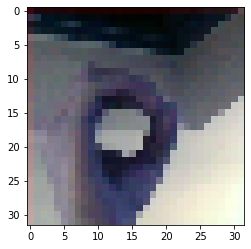

8 3


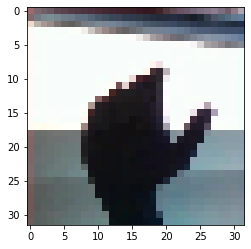

17 15


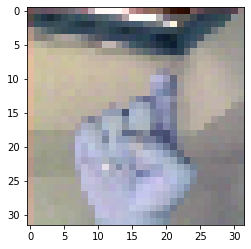

8 3


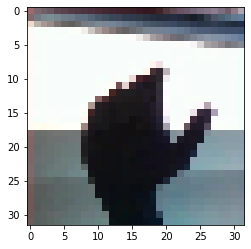

8 7


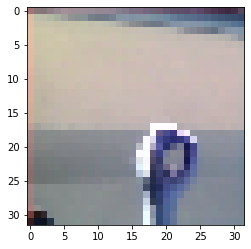

8 3


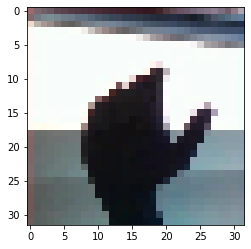

17 3


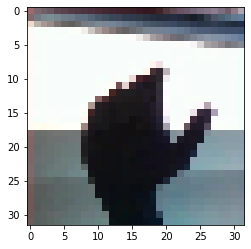

8 4


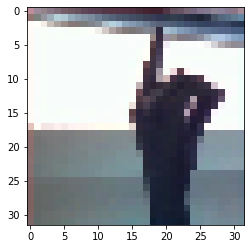

8 3


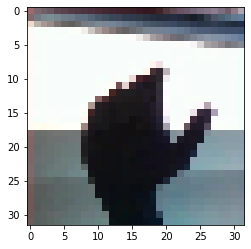

8 3


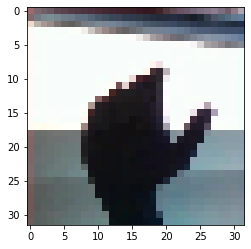

8 4


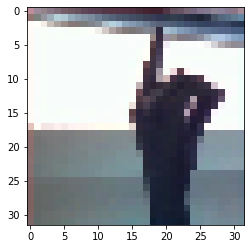

8 5


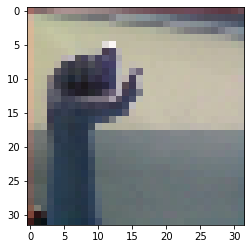

17 23


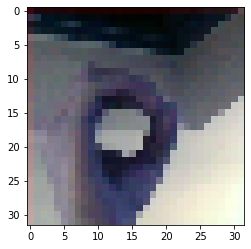

17 3


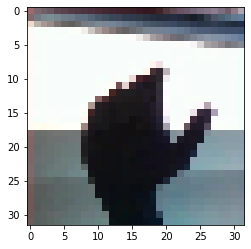

8 3


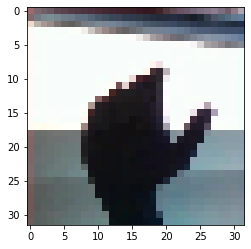

8 3


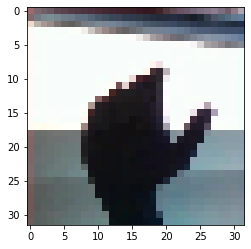

8 6


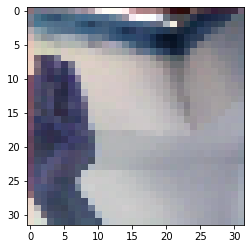

8 4


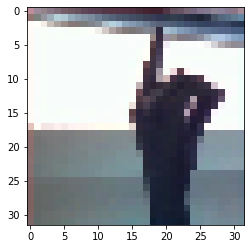

17 15


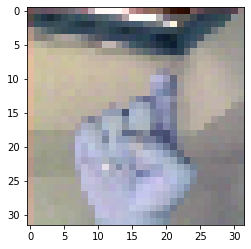

17 15


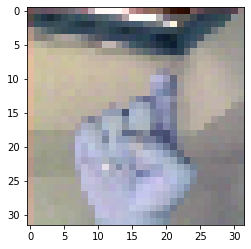

In [79]:
count = 0
incorrectPositions = []
for i,n in enumerate(inc):
    position = np.where(y_train[i] == 1)
    #print(position[0][0])
    if position[0][0]!= n and position[0][0] in [8,17]:
        print(position[0][0],n)
        plt.imshow(x_train[n], interpolation='nearest')
    #wrongLabels.append(i[1])
        plt.show()
#         plt.imshow(n, interpolation='nearest')
#         plt.show()
        #print(i.shape)
        #image = PIL.Image.fromarray(i, "RGB")
        incorrectPositions.append((x_train[i], position[0][0], n))

In [80]:
print(len(incorrectPositions))

30


17 17


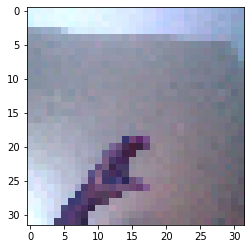

In [76]:
for i in incorrectPositions:
    print(i[1],i[2])
    plt.imshow(i[0], interpolation='nearest')
    #wrongLabels.append(i[1])
    plt.show()

In [ ]:
#rules

In [94]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 15.3 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [96]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [97]:
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
2.2.4


In [98]:
!git clone https://github.com/roboflow-ai/keras-yolo3.git

xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.


In [110]:
!curl -L "https://public.roboflow.com/ds/HSpt7catEh?key=dIGWXj6xrN" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   1692      0 --:--:-- --:--:-- --:--:--  1689
100 21.6M  100 21.6M    0     0  9453k      0  0:00:02  0:00:02 --:--:-- 18.9M
Archive:  roboflow.zip
   creating: American Sign Language Letters.v1-v1.yolokeras/
  inflating: American Sign Language Letters.v1-v1.yolokeras/README.dataset.txt  
  inflating: American Sign Language Letters.v1-v1.yolokeras/README.roboflow.txt  
   creating: American Sign Language Letters.v1-v1.yolokeras/test/
  inflating: American Sign Language Letters.v1-v1.yolokeras/test/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/test/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/test/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
  inflating: American Sign

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A4_jpg.rf.d03522dc177baa9498936c8f8d1ddca7.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A5_jpg.rf.11920540d5a68fdeed4b584fb24cd063.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A5_jpg.rf.7509038ff9765a183ca15e82b511d200.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A5_jpg.rf.8e80b6017d4cbe8756c372f28279e426.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A6_jpg.rf.37c4f4c6b45868e088a8ac2bc517952a.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A6_jpg.rf.705f49da7ca17d45761036a033a8330d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A6_jpg.rf.cc599760fd37ea163dcda60c01837b12.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A7_jpg.rf.5bf80e89a1bbeeefced8bc7be1492987.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/A7_jpg.rf.c87a

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C5_jpg.rf.8c234b487fc6caac3607984cda82f9c3.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C5_jpg.rf.99f22f57fc49f96914ae0b15bf18e590.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C5_jpg.rf.e16c2a097b885c325d790d56c39c3ce9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C6_jpg.rf.05217144d8c28d1ff7f060bf3210ed2d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C6_jpg.rf.4a61ae566ed0f8a43b664e763cbce85d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C6_jpg.rf.9f80dbbfd3bd0b4b9ec4a5d40adbc9bb.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C7_jpg.rf.153d4f0a86e41d21494e749ec943ff30.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C7_jpg.rf.9990a91baa98e68238716439a5128017.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/C7_jpg.rf.a5fd

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E10_jpg.rf.210b2fb96ddccadc6ccfa75a7b66b4a2.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E10_jpg.rf.3f2308817ab827f37fd416df0490b9c4.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E10_jpg.rf.563d7d9228bc5e4eacc9272ba7a4c4b2.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E11_jpg.rf.36d9fe2054ede595e2900c038368c6a9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E11_jpg.rf.8914cabd0f7d2ddb5cc828bd56abba3c.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E11_jpg.rf.cfb557e119c9bd2122afc43e476fd520.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E12_jpg.rf.569e076c619b027c9d3258a6a85ae3c5.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E12_jpg.rf.ba97ee9afb51c731e7d870ad8146b885.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/E12_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F23_jpg.rf.7885d9deccd14a4f1cca3a3d063da071.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F23_jpg.rf.a1c93723f021414543d098dcb7c70e3b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F24_jpg.rf.34619c0aba15b011b6da4db4f6b99b2f.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F24_jpg.rf.b439c3fcb01186c832c07b105383ea93.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F24_jpg.rf.d20a210eb1931d350fee49615fed039e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F25_jpg.rf.5783053c7a9046e380cc6abd732ee315.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F25_jpg.rf.71a50320caff7a1dceb2ca5543f7e050.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F25_jpg.rf.e43aa5b3641463b191ce8d9bbf96086e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/F26_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H22_jpg.rf.2163ca101bfb1359678f68d144f52cae.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H22_jpg.rf.b82be36228ab41a2c439b5eb658b4360.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H22_jpg.rf.caf6284be939baaa27a8fba14e56023a.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H23_jpg.rf.941cbff394281a33330d71c5219664c5.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H23_jpg.rf.b5691f8786672d48e042c29990fdcc0b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H23_jpg.rf.b8daa0441a0178d9496e6dcc003567c3.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H24_jpg.rf.365026af59e4a379bdc21ebf4053dcb8.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H24_jpg.rf.3f2729855fa8123d3a43e178b59f4f73.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/H24_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J10_jpg.rf.ea2c3ed75b4aa4570df7c84a2c1e1c50.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J11_jpg.rf.2757f232e691dd82be0c0b8a6f8fb9fa.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J11_jpg.rf.986b8fcff226ac7eb5c45c4a5c9aac1b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J11_jpg.rf.a9e6ab97a4377c361739865881eac00f.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J13_jpg.rf.a755c49bc5a3dbeb6a3793227851aa53.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J13_jpg.rf.a9f44e6c303c295651a24c1ec0f200d9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J13_jpg.rf.b919071bb39a291fe0a16f857396f03c.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J15_jpg.rf.b5d6738e225226c47a4a74f4218a325b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/J15_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K2_jpg.rf.17dba52b3990a4256016a9eb98cc6566.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K2_jpg.rf.293e6f972bf9ad34f687d8d97a545ec9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K2_jpg.rf.44d827e0289600627e1fcc43197301cb.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K3_jpg.rf.544b0d955d1da81bde0a204fd4db9573.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K3_jpg.rf.63e9984b36cf41a5adccc8c273db9e09.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K3_jpg.rf.66651e2fd83f4622815c2635819be065.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K4_jpg.rf.00821732715c9137b8060360770ea1d8.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K4_jpg.rf.605ce13ae422d6f639de55692691009e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/K4_jpg.rf.d6c7

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M21_jpg.rf.99bba85cee72f5d90a28094590ecbbbf.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M22_jpg.rf.2cf0b07c63b1ef20e78df60f6a7b067f.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M22_jpg.rf.999b428265334fcfe5fd0988bfaa8daf.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M22_jpg.rf.c8d94dabdd8eb27af53e313b95684480.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M23_jpg.rf.2e9dcb0d37abe04cf9f23fe2ee9b2217.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M23_jpg.rf.3e9d7973153921e680fa40d75687c927.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M23_jpg.rf.a18313130a192cb95e5bc7edfedebfd7.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M27_jpg.rf.010d328cdc61a634aec1540863be23b9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/M27_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O24_jpg.rf.d91bd53448757ff1c2108f7510579223.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O24_jpg.rf.f3415587f4f07b20350d11f64cf93303.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O25_jpg.rf.5a99d7ede796b9c82cafb4eb3ab28916.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O25_jpg.rf.957001b8f1a79a52c5cafdad4cd6ed4f.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O25_jpg.rf.c771f572ff41e1c7e2a5fe97387c2787.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O26_jpg.rf.1108b61327599ed4ae57a0e3f9638bdb.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O26_jpg.rf.5a108e7af0ac36cf632ffbf17c91164e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O26_jpg.rf.c479cbbfa52e8717c9a1c96fbe5357b4.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/O27_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q13_jpg.rf.4adb3d65e8f45c6d1fd51ea6ae071271.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q13_jpg.rf.8062f354cdada372d2f2b2167b6450d2.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q13_jpg.rf.8cbfbd3699e8252108bcb98059a9b0eb.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q14_jpg.rf.664d7a70451a8655827f624b0db4b548.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q14_jpg.rf.a814e740944ca15a90dcd2ba14c4e69a.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q14_jpg.rf.fcec5d4c1c36df5e8f3de38d4f7fdcb5.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q15_jpg.rf.738b99a91e16113998c2f42f069c3e59.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q15_jpg.rf.c1a8ac254417a095a40237f56137162d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Q15_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S26_jpg.rf.a5eecb26e2c6b281d86754c20e25c5a9.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S28_jpg.rf.015ec81f1c531610f515d4135ae7a335.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S28_jpg.rf.2dcf598761ec42989392fc8bf34d7dad.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S28_jpg.rf.81e8e1266bdac0df72d3dbf208d44e56.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S29_jpg.rf.597153b714fdd14a6464995904b69968.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S29_jpg.rf.a11f025e9515834b1078f51b49f74018.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S29_jpg.rf.b661aab69dbd76c5252db309fcd420c3.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S3_jpg.rf.519338be5baea0d10b44063693384d32.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/S3_jpg.

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U20_jpg.rf.84374a19603b78e186f750ead5b2b34e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U20_jpg.rf.c3a9ddf27b1f4895556aaf888f785784.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U20_jpg.rf.fb96046df59e2414e674582dc9c63583.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U22_jpg.rf.23b0f88fbc9d62876bd891370285253d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U22_jpg.rf.39fad8c864b033c16fc603832210f558.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U22_jpg.rf.a85f084efc438d9259c714b1db820695.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U23_jpg.rf.4486f88ed4e3d7916dccce56abb42da5.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U23_jpg.rf.58bb2072e58c0111cf8a50ad02811446.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/U23_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W10_jpg.rf.ee44bd6478acedaca641bc728337e83b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W11_jpg.rf.7ee0dbfc087573e240decfefea681112.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W11_jpg.rf.8f55a307005dc0662c339508a859e4be.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W11_jpg.rf.dcc540d2df5fba25bc9b89a4606cc9bb.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W12_jpg.rf.06c9bdac7028db273c39d69e1fa89531.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W12_jpg.rf.16f29bc421221e4f2c02c3faa5863d3c.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W12_jpg.rf.1e4f0a372c9e8fd0fc6de021539af12e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W13_jpg.rf.a13316604ffd0e8924f349398996492b.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/W13_jp

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X1_jpg.rf.2f5945cb8fc34dfe7291f978713425c8.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X1_jpg.rf.3cccdc1794022c52d9d647df08942bcd.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X1_jpg.rf.75fa4a2cec8c5c91b5436756022a9449.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X21_jpg.rf.6d5aa7c163e8126919e743c328757527.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X21_jpg.rf.99547d367f8baf8b52fd74468d6df5da.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X21_jpg.rf.f7dcb8c4df1b628a748a0552457fdaf5.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X22_jpg.rf.05732e3e92b7d7abbba7c3eb54b022b8.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X22_jpg.rf.561d1dfcf38c9f341910d1a8bfebcf3e.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/X22_jpg.r

  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Y8_jpg.rf.ccd5d9ebf920f108455ff8c15910c6d6.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Y9_jpg.rf.82c8cb326bd0bf2242bfc4a57633a0e1.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Y9_jpg.rf.a65336fbc22d605d63c15b1b1f316f6d.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Y9_jpg.rf.fe9c63458e0f5a64a7116a6a6b76405f.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Z0_jpg.rf.175f325d6ed400b486b3b60a374a8477.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Z0_jpg.rf.3a019ac06f74cb1935de466f8c861403.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Z0_jpg.rf.67eb05a396fbaabaad870ba7a2264707.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Z10_jpg.rf.8d515a44b7041028299df663502388dc.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/train/Z10_jpg.rf.99

  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/A3_jpg.rf.8850b77ae61284df2b0b40d1475b97f1.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/A9_jpg.rf.650eeae5bbceb2d8cc980bfe16f8c8f6.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B0_jpg.rf.79d38fe6bc3858d736cda3dbc4847eb0.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B10_jpg.rf.8398bef4b6a6fbe452dba4b8bae60d18.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B12_jpg.rf.cb6e9aaaa48880c87cc76866bbf41ba7.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B1_jpg.rf.da7a7d47e2e94890eb77d693032248cd.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B21_jpg.rf.5ae296aea177a40bb6a61ff0d51f6154.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B23_jpg.rf.1a1c5d5d273f164f71090b8f3acaec91.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/B5_jpg.rf.

  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/N18_jpg.rf.7afd0b89b7abd607f68ad37de502ac52.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/N1_jpg.rf.e4e99172cf71091434b1ed690ccddafa.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O0_jpg.rf.023d580ccbb5070164655cf7821c68cd.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O11_jpg.rf.37d2a88c110bbbb430020119e51dfc50.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O13_jpg.rf.75d33887d28c085cba223997f15fee81.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O17_jpg.rf.8d4c8a8fd1153874783e1c8c243a7b19.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O22_jpg.rf.89b14d5285d9ee7865810c7fb4156082.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O3_jpg.rf.c1142ae2be908c04d02645d736242035.jpg  
  inflating: American Sign Language Letters.v1-v1.yolokeras/valid/O8_jpg.rf

In [112]:
pwd

'/Users/availablenow/Documents'

In [114]:
%ls

ASL Project/
ASL_test.py
American Sign Language Letters.v1-v1.yolokeras/
GitHub/
README.md
amer_sign2.png
amer_sign3.png
american_sign_language.PNG
missing_directory.zip
nested_portion1.zip
sign_mnist_test.csv
sign_mnist_train.csv


In [89]:
%cd train

[Errno 2] No such file or directory: 'train'
/Users/availablenow/Documents/ASL Project


In [90]:
%mv * ../

In [91]:
%cd ..

/Users/availablenow/Documents


In [107]:
%ls

ASL Project/
ASL_test.py
GitHub/
Practicing Lab Safety-Jigsaw_GalleryWalk_Biotech2 2.pptx
Practicing Lab Safety-Jigsaw_GalleryWalk_Biotech2 2.pptx 2.cpgz
Practicing Lab Safety-Jigsaw_GalleryWalk_Biotech2 2.pptx 3.cpgz
Practicing Lab Safety-Jigsaw_GalleryWalk_Biotech2 2.pptx.cpgz
README.md
Zoom/
amer_sign2.png
amer_sign3.png
american_sign_language.PNG
finalpodcast.aup
finalpodcast.mp3
finalpodcast.wav
finalpodcast_data/
link crew video.MOV
missing_directory.zip
nested_portion1.zip
sign_mnist_test.csv
sign_mnist_train.csv


In [101]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

/bin/sh: wget: command not found


In [120]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

python: can't open file 'convert.py': [Errno 2] No such file or directory


In [119]:
pwd

'/Users/availablenow/Documents'